<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/EHR_data_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise: Notebook to teach unsupervised machine learning using electronic healthcare data (EHR data)

This notebook demonstrates unsupervised machine learning techniques using electronic healthcare data. It covers the following steps:

*   **Data Loading and Preprocessing:** Loading a diabetes dataset and normalizing numerical features.
*   **Dimensionality Reduction:** Applying PCA and t-SNE to reduce the dimensions of the data for visualization and analysis.
*   **Clustering:** Performing K-Means clustering on the reduced data to identify potential patient subgroups.
*   **Visualization:** Visualizing the data in lower dimensions and the identified clusters to gain insights.

In [80]:
pip install pandas scikit-learn seaborn matplotlib openml

## 🧠 Teaching Points

### ✅ Concepts to cover:
- **Preprocessing**: Dropping NAs, scaling
- **Dimensionality reduction**: PCA + t-SNE
- **Clustering**: k-Means, DBSCAN, hierarchical clustering
- **Clinical interpretation**: What does each cluster represent?

---

### 🔬 Exploratory Ideas:
- Color by **readmission** or **gender**
- Add **medication** or **diagnosis** categories
- Compare **k-means** vs **DBSCAN**

---

### 📝 Optional Exercises for Students
- Try different `n_clusters` in **k-means** — what’s the best number?
- Use **DBSCAN** or **AgglomerativeClustering** instead.
- Visualize the **PCA plot** alongside **t-SNE** — which is more informative?
- Explore correlations with **hospital readmission** or **comorbidities**.


## Load libraries

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import openml

## Load diabetes data and perform data munging and filtering

* Data filtering

* Data normalization

In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
url = "https://raw.githubusercontent.com/neelsoumya/python_machine_learning/main/data/diabetes_kaggle.csv"
df = pd.read_csv(url)

# Normalize numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Filter: Glucose > 0.5 and BMI < 0.3 (normalized values)
filtered_df = df_normalized[
    (df_normalized['Glucose'] > 0.5) &
    (df_normalized['BMI'] < 0.3)
]

print(filtered_df.head())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
9       0.470588  0.628141       0.786885       0.000000  0.000000  0.000000   
49      0.411765  0.527638       0.000000       0.000000  0.000000  0.000000   
50      0.058824  0.517588       0.655738       0.111111  0.096927  0.289121   
145     0.000000  0.512563       0.614754       0.232323  0.000000  0.000000   
239     0.000000  0.522613       0.622951       0.000000  0.000000  0.274218   

     DiabetesPedigreeFunction       Age  Outcome  
9                    0.065756  0.550000      1.0  
49                   0.096926  0.050000      0.0  
50                   0.176345  0.016667      0.0  
145                  0.210931  0.000000      0.0  
239                  0.215201  0.100000      0.0  


## Visualization

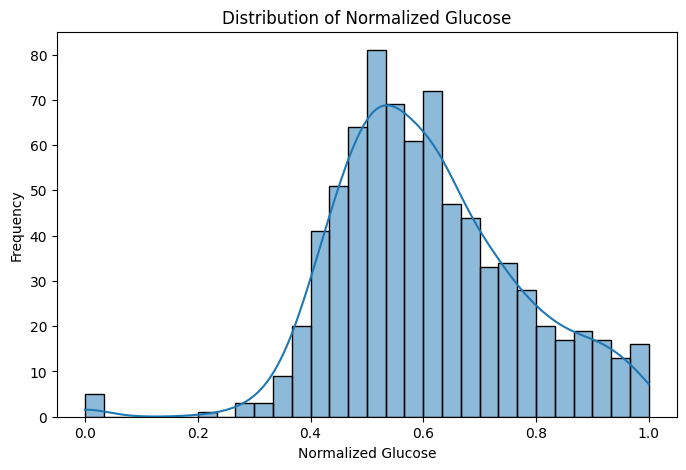

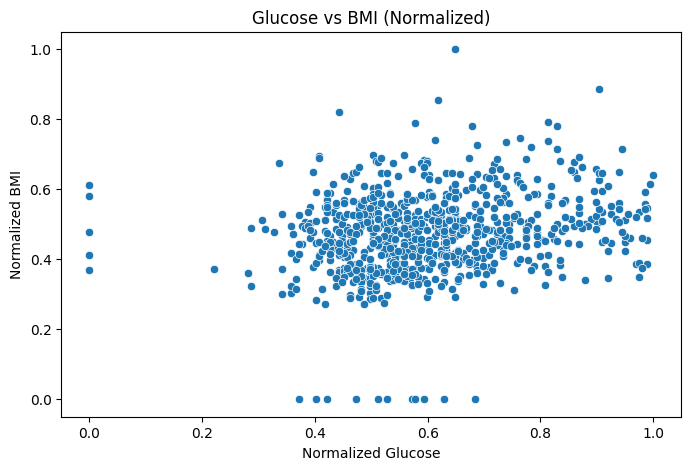

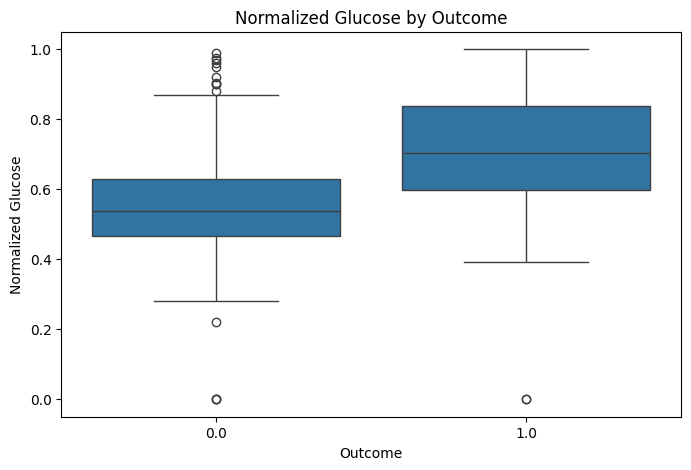

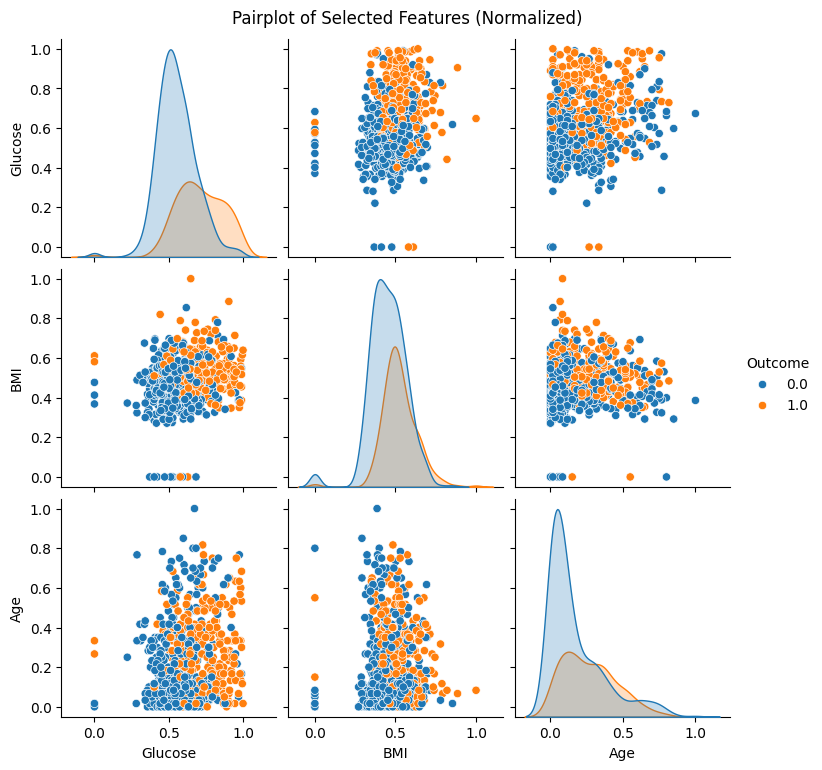

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_normalized['Glucose'], bins=30, kde=True)
plt.title('Distribution of Normalized Glucose')
plt.xlabel('Normalized Glucose')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Glucose', y='BMI', data=df_normalized)
plt.title('Glucose vs BMI (Normalized)')
plt.xlabel('Normalized Glucose')
plt.ylabel('Normalized BMI')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=df_normalized)
plt.title('Normalized Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Normalized Glucose')
plt.show()

# Pairplot
sns.pairplot(df_normalized[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.suptitle('Pairplot of Selected Features (Normalized)', y=1.02)
plt.show()

## Perform PCA

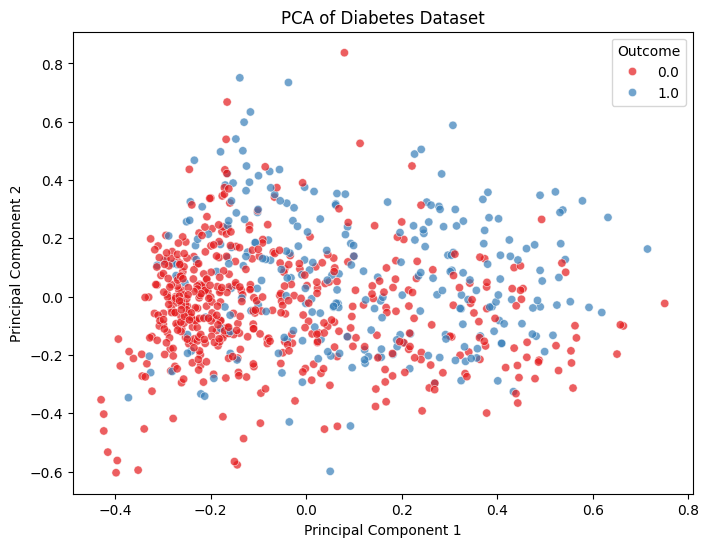

Explained variance ratio: [0.31192249 0.21186663]
Total explained variance (2 components): 0.5237891212308199


In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude the target column for PCA
features = df_normalized.drop(columns=['Outcome'])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Outcome'] = df_normalized['Outcome'].values

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, palette='Set1', alpha=0.7)
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance (2 components):", pca.explained_variance_ratio_.sum())

## Evaluation

* How to interpret these clusters?
* What are the next steps?

* TODO: plot other features in PCA and tSNE clusters

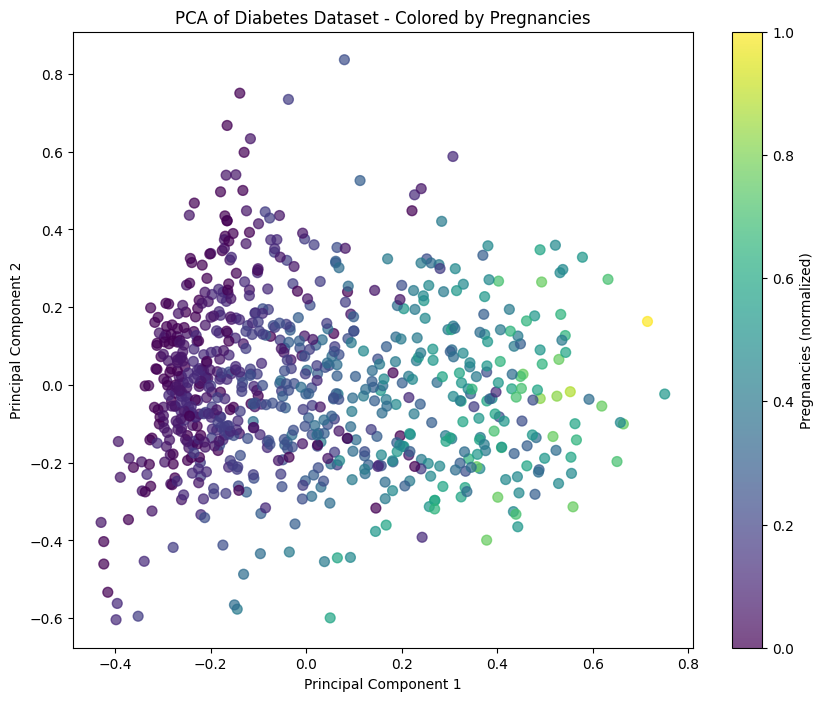

In [85]:
# Visualize PCA results colored by Pregnancies
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df_normalized['Pregnancies'],
                     cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Pregnancies (normalized)')
plt.title('PCA of Diabetes Dataset - Colored by Pregnancies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Exercise

* Colour the PCA plot by BloodPressure, BMI and Age

* Try other features ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')

Text(0.5, 1.0, 'PCA of Diabetes Dataset - Colored by BMI')

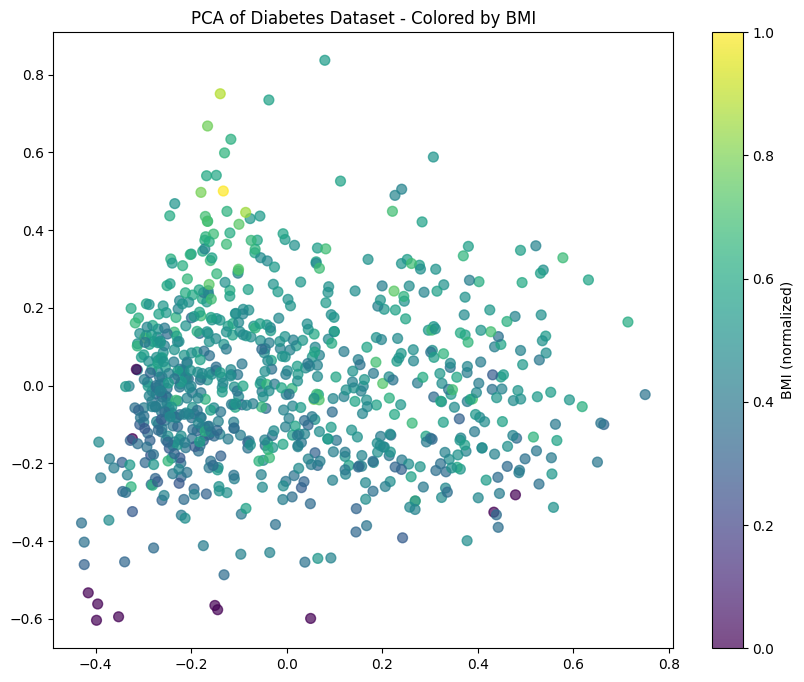

In [86]:
# Visualize PCA results colored by BMI
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df_normalized['BMI'],
                     cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='BMI (normalized)')
plt.title('PCA of Diabetes Dataset - Colored by BMI')

## Goals of unsupervised learning

The primary goal is to uncover hidden patterns, structures, and relationships within the data. This can lead to:

* the generation of new hypotheses about the underlying phenomena, which can then be tested in follow-up studies using statistical methods

* or through the application of supervised machine learning techniques with labeled data.

Essentially, unsupervised learning helps us explore the data and formulate questions that can be further investigated.

However it is never the end of the data science pipeline but leads to more targetted investigations.

## Perform tSNE

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


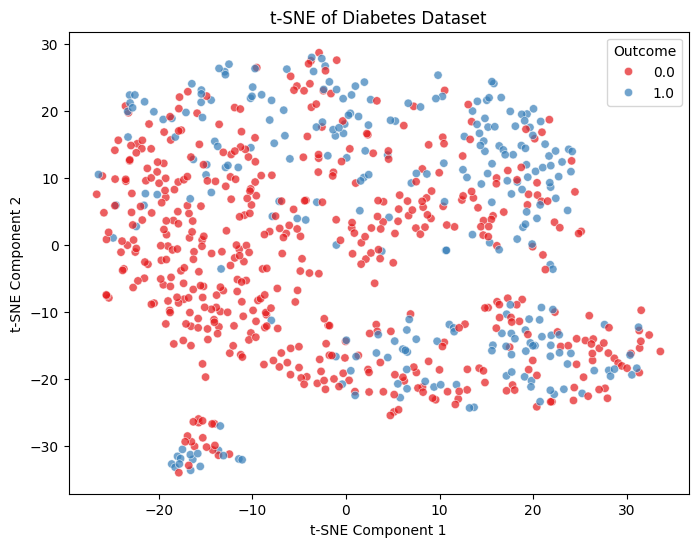

In [87]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude the target column for t-SNE
features = df_normalized.drop(columns=['Outcome'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Outcome'] = df_normalized['Outcome'].values

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Outcome', data=tsne_df, palette='Set1', alpha=0.7)
plt.title('t-SNE of Diabetes Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Outcome')
plt.show()

## Evaluation

Now let us color the tSNE plot by some other features

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


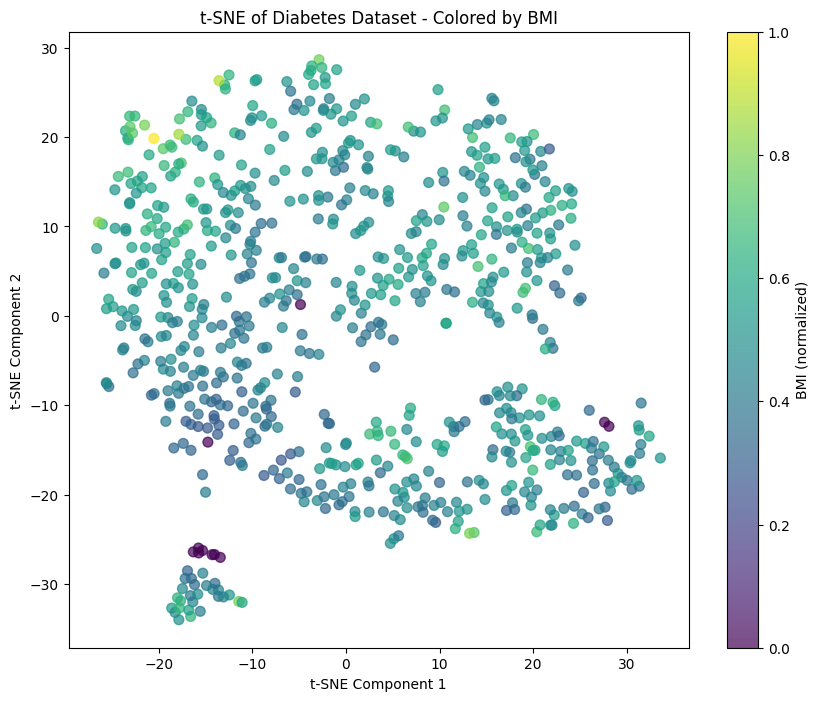

In [88]:
# Exclude the target column for t-SNE
# Already done (so commenting out)
# features_for_tsne = df_normalized.drop(columns=['Outcome', 'Cluster'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features_for_tsne)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
#tsne_df['Outcome'] = df_normalized['Outcome'].values
#tsne_df['Cluster'] = df_normalized['Cluster'].values

# Visualize t-SNE colored by BMI
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=df_normalized['BMI'],
                     cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='BMI (normalized)')
plt.title('t-SNE of Diabetes Dataset - Colored by BMI')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Exercise: Vary other parameters such as perplexity

* The idea being that if you have a really important pattern you think you see in the data, it should hold even if you vary perplexity

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


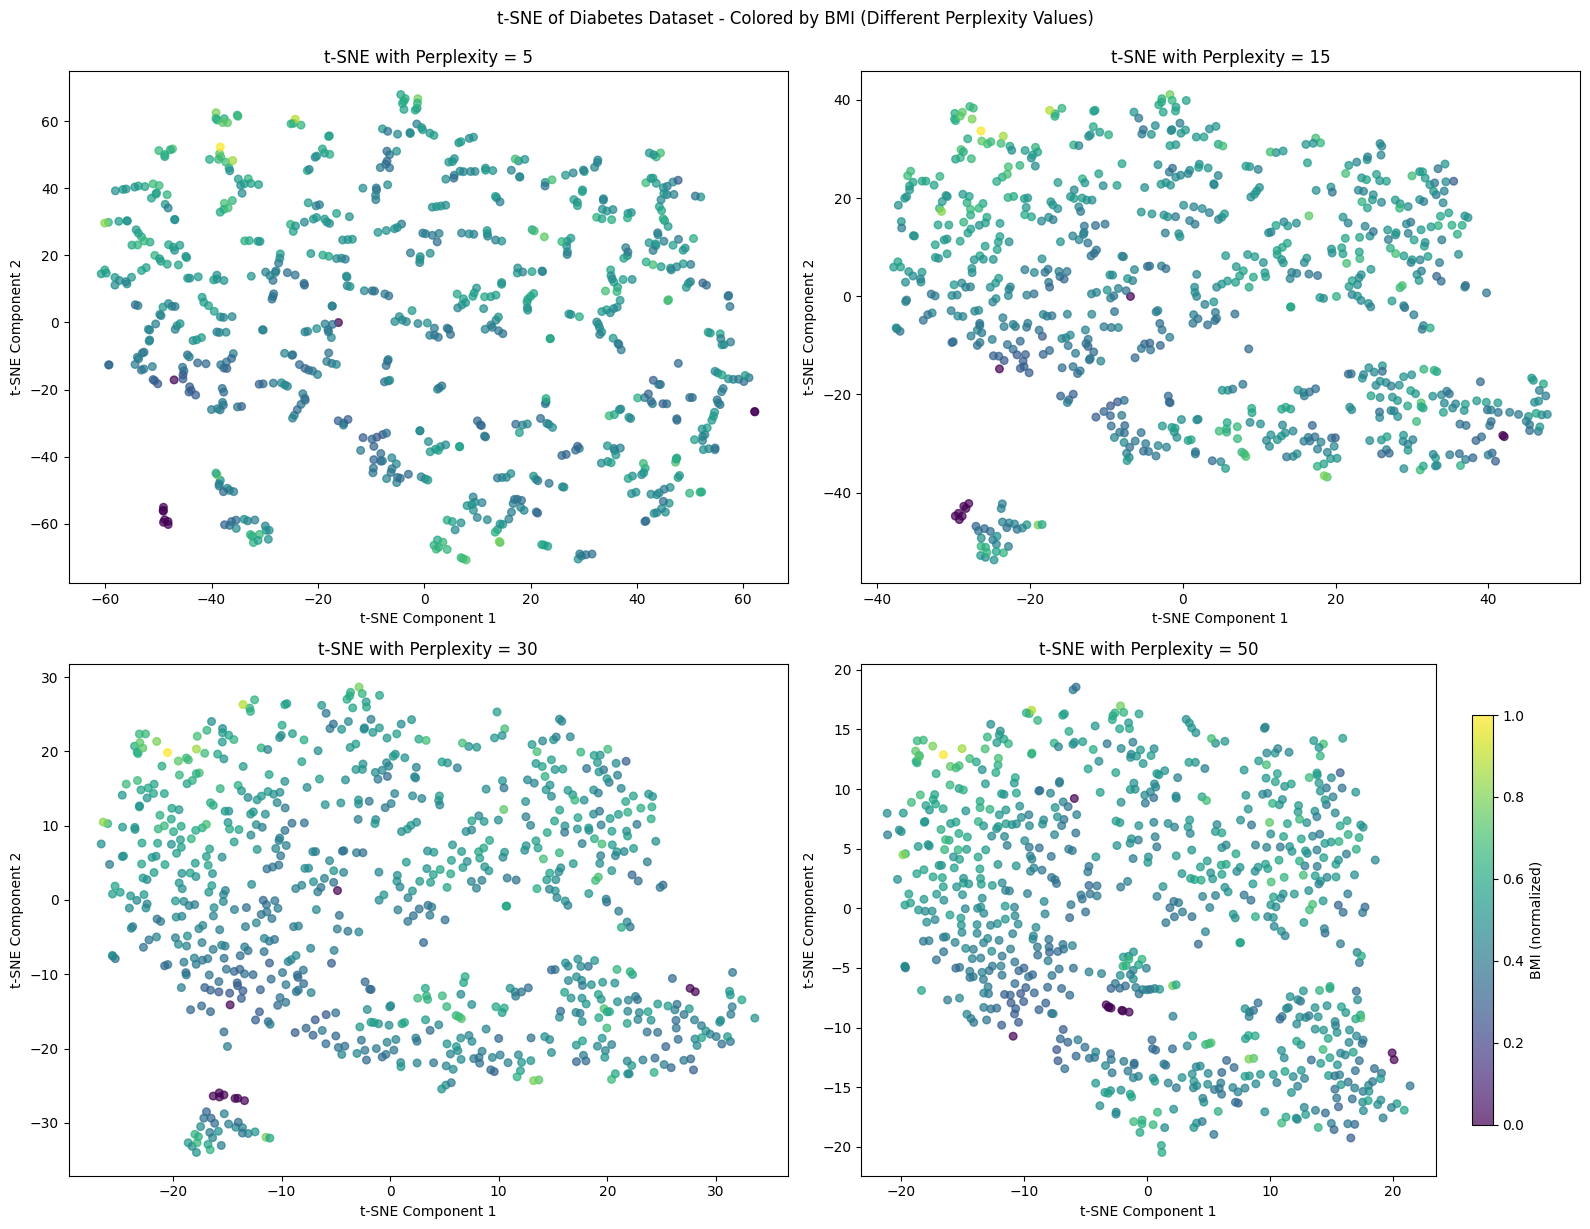

In [89]:
# Exclude the target column for t-SNE
# features_for_tsne = df_normalized.drop(columns=['Outcome', 'Cluster'])

# Try different perplexity values
perplexity_values = [5, 15, 30, 50]

# Create subplots for different perplexity values
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, perplexity in enumerate(perplexity_values):
    # Apply t-SNE with current perplexity
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    tsne_results = tsne.fit_transform(features_for_tsne)

    # Create scatter plot colored by BMI
    scatter = axes[i].scatter(tsne_results[:, 0], tsne_results[:, 1],
                             c=df_normalized['BMI'], cmap='viridis', alpha=0.7, s=30)
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

    # Add colorbar to the last subplot
    if i == len(perplexity_values) - 1:
        cbar = plt.colorbar(scatter, ax=axes[i], shrink=0.8)
        cbar.set_label('BMI (normalized)')

plt.tight_layout()
plt.suptitle('t-SNE of Diabetes Dataset - Colored by BMI (Different Perplexity Values)', y=1.02)
plt.show()

# Also create a single detailed plot with the best perplexity (you can adjust this)
#best_perplexity = 30  # You can change this based on the results above
#tsne_best = TSNE(n_components=2, random_state=42, perplexity=best_perplexity, n_iter=1000)
#tsne_results_best = tsne_best.fit_transform(features_for_tsne)

#plt.figure(figsize=(10, 8))
#scatter = plt.scatter(tsne_results_best[:, 0], tsne_results_best[:, 1],
#                     c=df_normalized['BMI'], cmap='viridis', alpha=0.7, s=50)
#plt.colorbar(scatter, label='BMI (normalized)')
#plt.title(f't-SNE of Diabetes Dataset - Colored by BMI (Perplexity = {best_perplexity})')
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
#plt.show()

## Hierarchical clustering

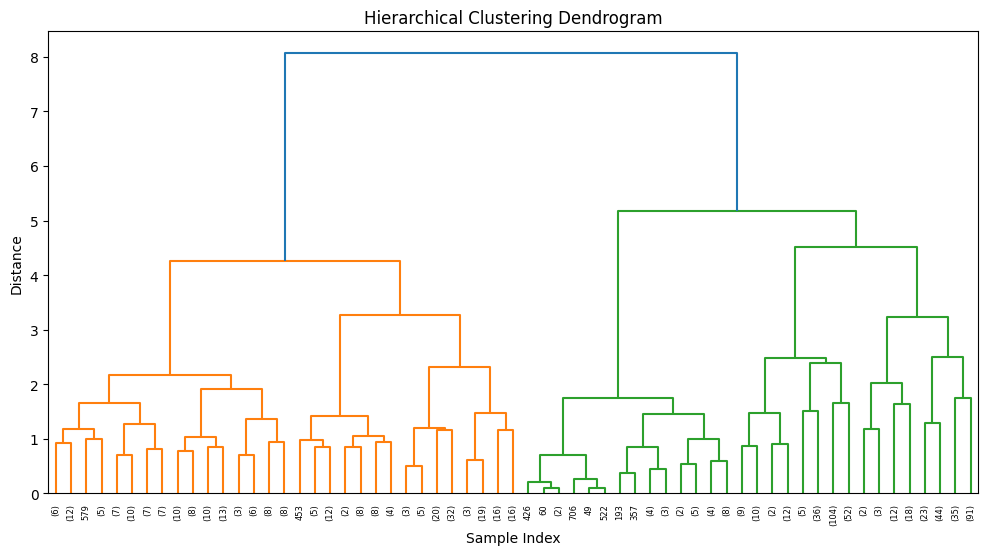

In [90]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the target column for clustering
features = df_normalized.drop(columns=['Outcome'])

# Perform hierarchical clustering
Z = linkage(features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 2 clusters)
cluster_labels = fcluster(Z, t=2, criterion='maxclust')
df_normalized['Cluster'] = cluster_labels

# If you have PCA results in pca_df:
# pca_df['Cluster'] = cluster_labels

# Visualize clusters on PCA components (if available)
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', alpha=0.7)
# plt.title('Hierarchical Clusters on PCA Components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

## Heatmaps

Text(170.72222222222223, 0.5, 'Sample Index')

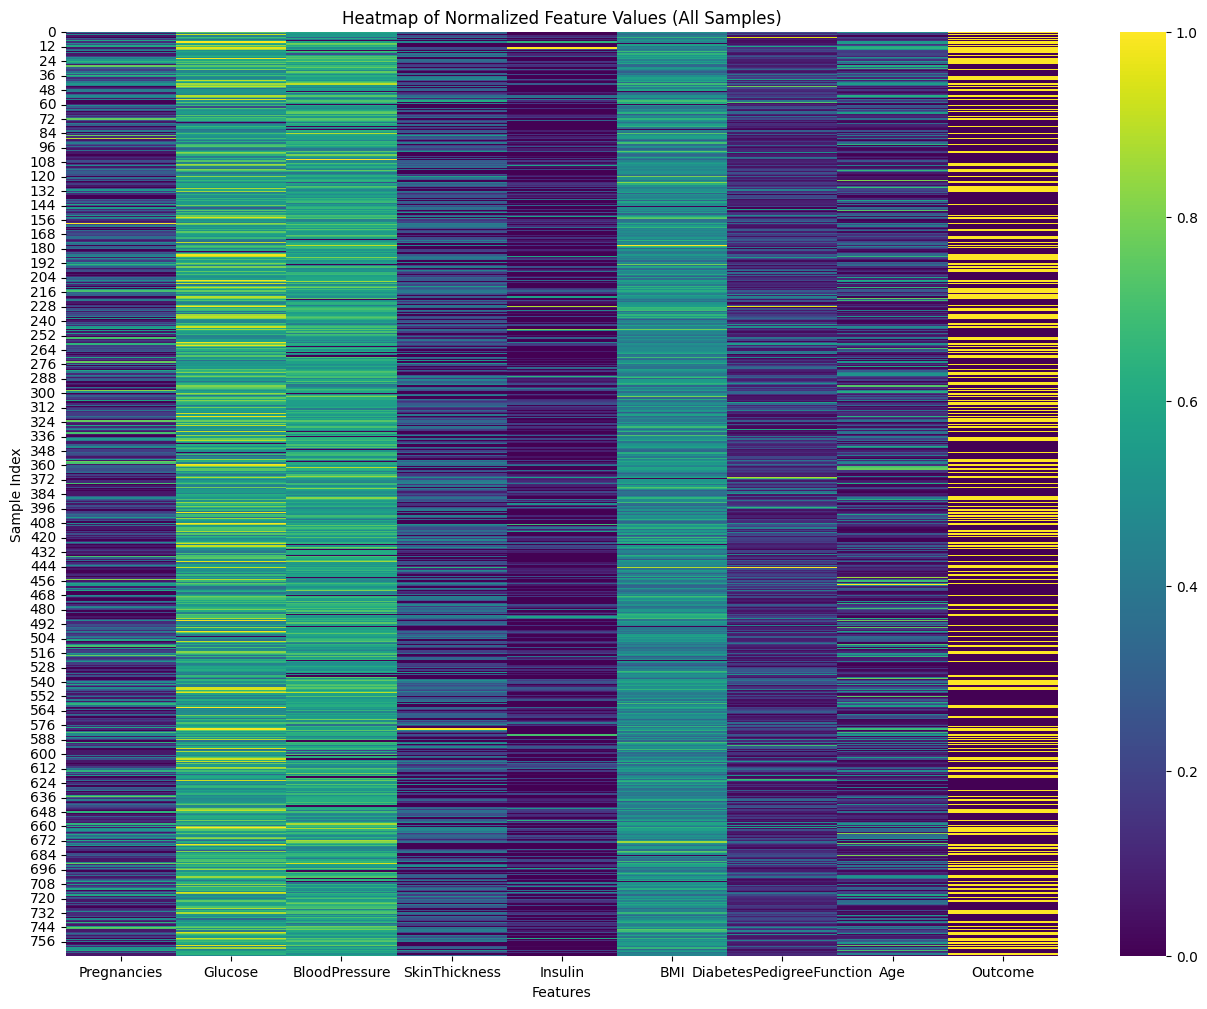

In [91]:
# Plot a heatmap of the normalized feature values for all samples
plt.figure(figsize=(16, 12))
sns.heatmap(df_normalized.drop(columns=['Cluster']), cmap='viridis', cbar=True)
plt.title('Heatmap of Normalized Feature Values (All Samples)')
plt.xlabel('Features')
plt.ylabel('Sample Index')

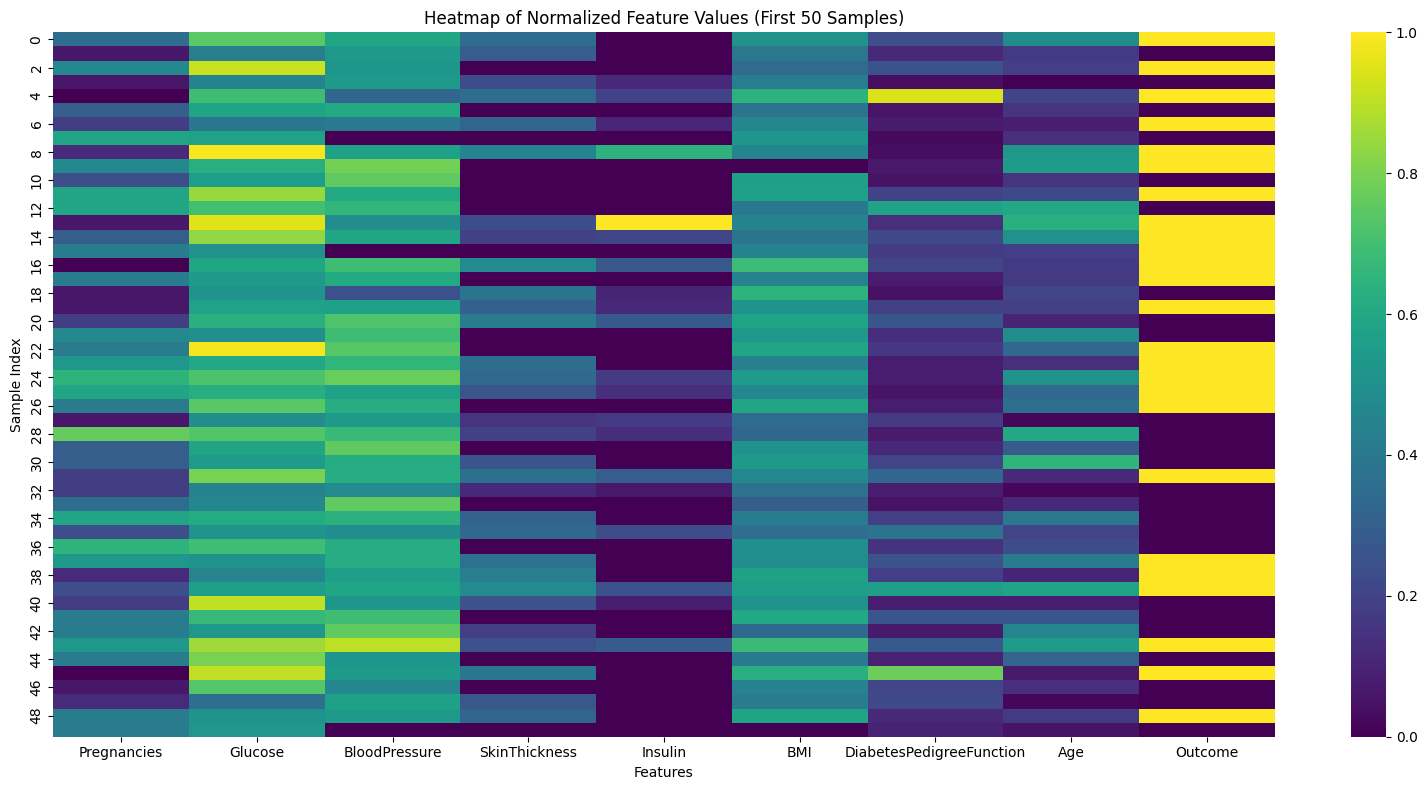

In [92]:
# Plot a heatmap of the normalized feature values for the first 50 samples
plt.figure(figsize=(16, 8))
sns.heatmap(df_normalized.drop(columns=['Cluster']).iloc[:50], cmap='viridis', cbar=True)
plt.title('Heatmap of Normalized Feature Values (First 50 Samples)')
plt.xlabel('Features')
plt.ylabel('Sample Index')
plt.tight_layout()
plt.show()

### Correlation heatmap

* a correlation heatmap of the normalized diabetes data using seaborn. This heatmap will help you visualize the relationships between the different features in your dataset.

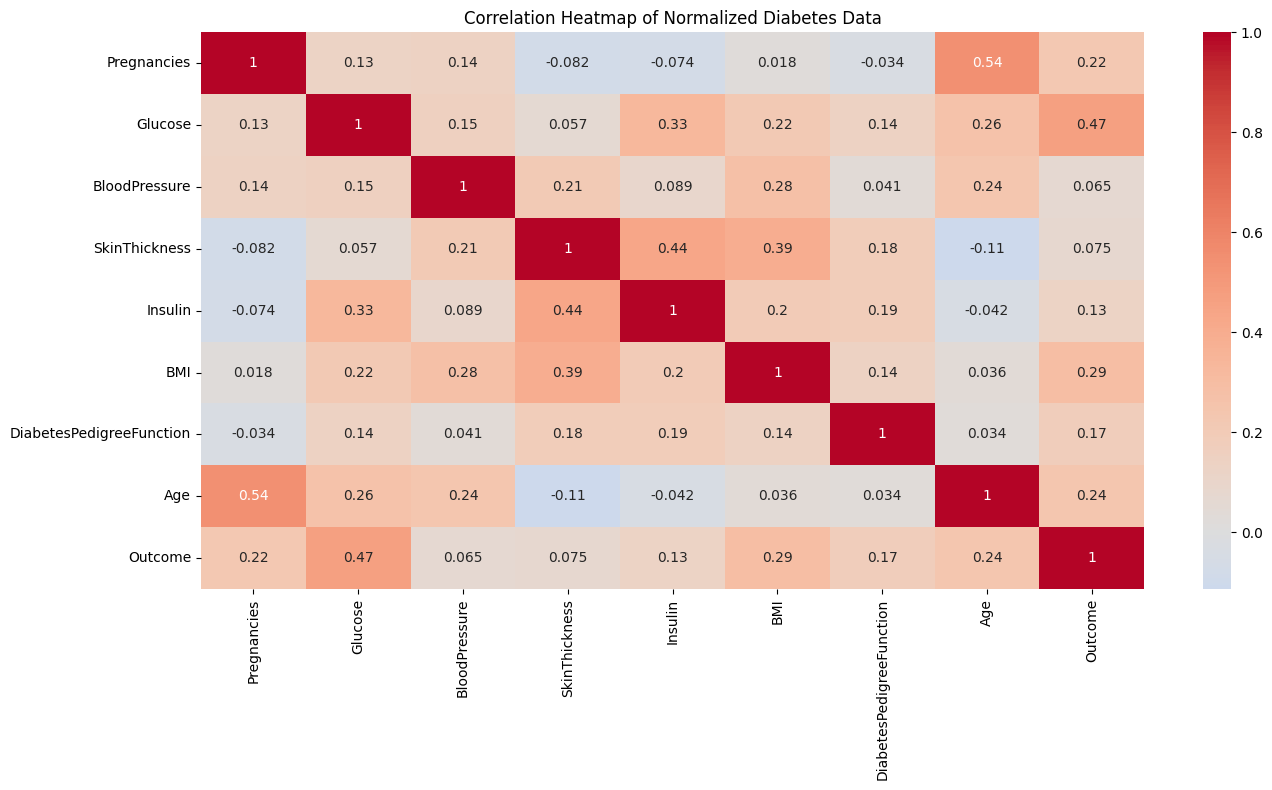

In [93]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_normalized.drop(columns=['Cluster']).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Normalized Diabetes Data')
plt.tight_layout()
plt.show()

## Alternative approach (DEPRECATED)

Available columns in the dataset:
Index(['column_a', 'column_b', 'column_c', 'column_d', 'column_e', 'column_f',
       'column_g', 'column_h', 'column_i', 'column_j', 'column_k', 'column_l',
       'column_m', 'column_n', 'column_o', 'column_p', 'column_q', 'column_r',
       'column_s', 'column_t', 'column_u', 'column_v', 'column_w', 'column_x',
       'column_y', 'column_z'],
      dtype='object')


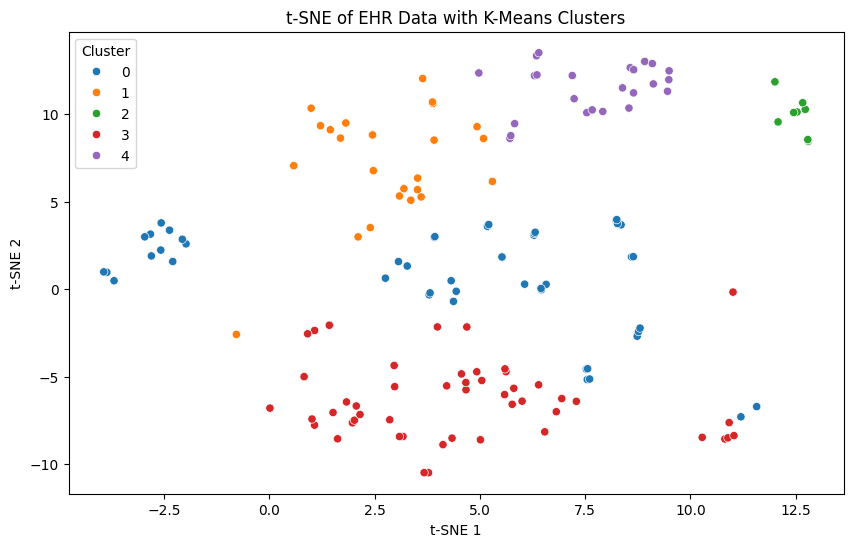

In [94]:


# Step 1: Load dataset from OpenML
diabetes_data = openml.datasets.get_dataset(43569)  # Diabetes 130-US hospitals
df, _, _, _ = diabetes_data.get_data(dataset_format="dataframe")

print("Available columns in the dataset:")
print(df.columns)

# Step 2: Select all numeric features for clustering
data = df.select_dtypes(include=['number']).dropna()

# Step 3: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 4: Dimensionality reduction
pca_model = PCA(n_components=10, random_state=42)
pca = pca_model.fit_transform(X_scaled)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42).fit_transform(pca)

# Step 5: Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # Added n_init for KMeans
clusters = kmeans.fit_predict(pca)

# Step 6: Visualize t-SNE + clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=clusters, palette='tab10')
plt.title("t-SNE of EHR Data with K-Means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.show()

## Perform PCA

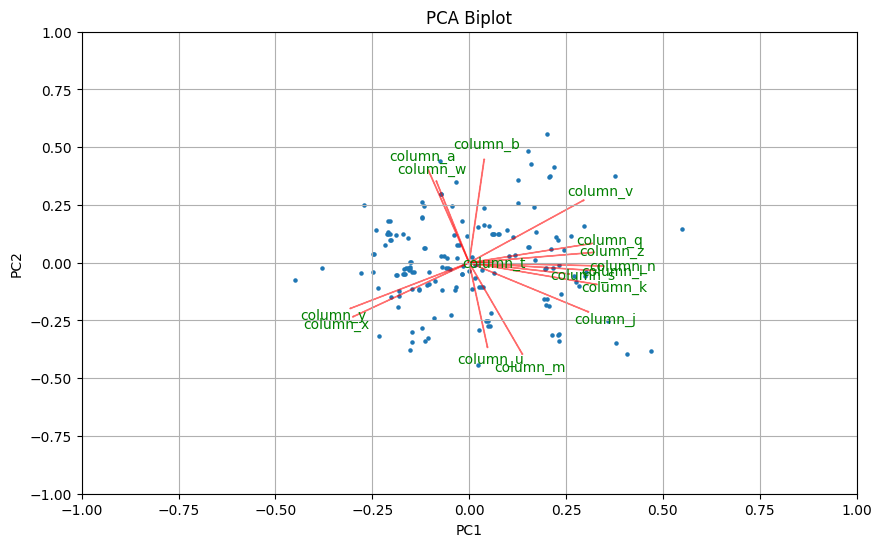

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create a PCA biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 6))
    plt.scatter(xs * scalex, ys * scaley, s=5)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title("PCA Biplot")
    plt.grid()

# Get the feature names from the 'data' DataFrame
feature_names = data.columns

# Assuming 'pca' object from the previous cell contains the fitted PCA results
# and 'data' dataframe contains the original data used for PCA
# Create the biplot using the first two principal components
biplot(pca[:, 0:2], np.transpose(pca_model.components_[0:2, :]), labels=feature_names) # pca_model is not defined, should use pca object

plt.show()

## References

[1] https://archive.ics.uci.edu/dataset/34/diabetes